***TEAM - L***

## **IMPORT THE DATASET**

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df

Saving d1.csv to d1.csv


,FactTablePK,dimDateServicePK,dimPayerPK,PatientNumber_x,CPTUnits,GrossCharge,Payment,Adjustment,AR,Unnamed: 9,...,CptCode,CptDesc,CptGrouping,TransactionType,Transaction,AdjustmentReason,LocationName,DiagnosisCode,DiagnosisCodeDescription,DiagnosisCodeGroup
0,1082164042,20191215,58987,21384136,-600,-6600.0,0.0,0.0,-6600.0,NaN,...,J0585,"Injection,onabotulinumtoxina",HCPCS Level II Codes,Charge,"pr injection,onabotulinumtoxina",Charge,Evergreen Clinic,R252,Cramp and spasm,Symptoms and signs involving the nervous and m...
1,1027823678,20191215,98735,21387258,-1,-3899.0,0.0,0.0,-3899.0,NaN,...,33533,Cabg arterial single,Surgery,Charge,"cabg, arterial, single",Charge,Guardian Medical Clinic,I251,Atherosclerotic heart disease,Ischaemic heart diseases
2,922963624,20191215,92873,21381441,-1,-2670.0,0.0,0.0,-2670.0,NaN,...,33361,Replace aortic valve perq,Surgery,Charge,tavr percutaneous femoral,Charge,Angelstone Community Hospital,I350,Aortic (valve) stenosis,Other forms of heart disease
3,923120306,20191215,58987,21381441,-1,-2670.0,0.0,0.0,-2670.0,NaN,...,33361,Replace aortic valve perq,Surgery,Charge,tavr percutaneous femoral,Charge,Angelstone Community Hospital,I350,Aortic (valve) stenosis,Other forms of heart disease
4,951760836,20191215,98735,21381441,-1,-2670.0,0.0,0.0,-2670.0,NaN,...,33361,Replace aortic valve perq,Surgery,Charge,tavr percutaneous femoral,Charge,Angelstone Community Hospital,I350,Aortic (valve) stenosis,Other forms of heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84214,931232173,20191215,98735,21358957,1,4941.0,0.0,0.0,4941.0,NaN,...,33430,Replacement of mitral valve,Surgery,Charge,"Procedure, Exam or Treatment",Charge,Angelstone Community Hospital,I340,Mitral (valve) insufficiency,Other forms of heart disease
84215,902187364,20191215,58987,21384745,1,6243.0,0.0,0.0,6243.0,NaN,...,36475,Endovenous rf 1st vein,Surgery,Charge,"Procedure, Exam or Treatment",Charge,Fairview General Hospital,I872,Venous insufficiency (chronic)(peripheral),"Diseases of veins, lymphatic vessels and lymph..."
84216,1082164041,20191215,58987,21384136,600,6600.0,0.0,0.0,6600.0,NaN,...,J0585,"Injection,onabotulinumtoxina",HCPCS Level II Codes,Charge,"pr injection,onabotulinumtoxina",Charge,Evergreen Clinic,R252,Cramp and spasm,Symptoms and signs involving the nervous and m...
84217,1098585339,20191215,58987,21384136,600,6600.0,0.0,0.0,6600.0,NaN,...,J0585,"Injection,onabotulinumtoxina",HCPCS Level II Codes,Charge,"pr injection,onabotulinumtoxina",Charge,Evergreen Clinic,R252,Cramp and spasm,Symptoms and signs involving the nervous and m...


In [ ]:
# CPTUnits (procedure units) - should never be 0 or negative (missing data).
# GrossCharge (total billed) - zero charge is unrealistic; negative charge are errors.
# Payment (amount paid) - zeros can be unpaid cases.
# Adjustment (discounts) - zeros can be valid (no discounts applied).
# AR (accounts receivable) - should never be negative (GrossCharge - Payment - Adjustment).
# ProviderFTE (Full-Time Equivalent) - refers to amount of time a provider works compared to standardful-time schedule.
# PatientAge - age cannot be zero

# ***Predicting Gross Charges in Healthcare Billing ***

## **DELETE UNNECESSARY COLUMNS**

In [ ]:
# drop unnecessary columns
data = df.drop(columns = ['Unnamed: 9', 'Unnamed: 24'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84219 entries, 0 to 84218
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FactTablePK               84219 non-null  int64  
 1   dimDateServicePK          84219 non-null  int64  
 2   dimPayerPK                84219 non-null  int64  
 3   PatientNumber_x           84219 non-null  int64  
 4   CPTUnits                  84219 non-null  int64  
 5   GrossCharge               84219 non-null  float64
 6   Payment                   84219 non-null  float64
 7   Adjustment                84219 non-null  float64
 8   AR                        84219 non-null  float64
 9   FirstName                 84219 non-null  object 
 10  LastName                  84219 non-null  object 
 11  Email                     84219 non-null  object 
 12  PatientGender             84219 non-null  object 
 13  PatientAge                84219 non-null  int64  
 14  City  

## **DATA VERIFICATION**

In [ ]:
# check zeros and negatives

# zeros
print('zero counts: ')
n1 = data[['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']]
print(n1.eq(0).sum())

# negatives
print('\nnegative counts: ')
n2 = data[['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']]
print(n2[n2 < 0].count())

zero counts: 
CPTUnits       69675
GrossCharge    73937
Payment        71622
Adjustment     63704
AR             40825
PatientAge       894
ProviderFTE      254
dtype: int64

negative counts: 
CPTUnits        1039
GrossCharge      830
Payment        12233
Adjustment     16631
AR             29694
PatientAge         0
ProviderFTE        0
dtype: int64


## **DATA PRE-PROCESSING**

**ABSOLUTE VALUE**

In [ ]:
# convert CPTUnits, GrossCharge, Payment, Adjustment to positive
data['CPTUnits'] = data['CPTUnits'].abs()
data['GrossCharge'] = data['GrossCharge'].abs()
data['Payment'] = data['Payment'].abs()
data['Adjustment'] = data['Adjustment'].abs()

# re calculate AR based on corrected values
data['AR'] = data['GrossCharge'] - data['Payment'] - data['Adjustment']

# convert numeric columns to proper data types
data['CPTUnits'] = data['CPTUnits'].astype(int)
data['GrossCharge'] = data['GrossCharge'].astype(float)
data['Payment'] = data['Payment'].astype(float)
data['Adjustment'] = data['Adjustment'].astype(float)
data['AR'] = data['AR'].astype(float)
data['PatientAge'] = data['PatientAge'].astype(int)
data['ProviderFTE'] = data['ProviderFTE'].astype(float)

# repalced negative AR values using median
median_AR = data[data['AR'] >= 0]['AR'].median()
data.loc[data['AR'] < 0, 'AR'] = median_AR


print('\nnegative counts: ')
n2 = data[['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']]
print(n2[n2 < 0].count())



negative counts: 
CPTUnits       0
GrossCharge    0
Payment        0
Adjustment     0
AR             0
PatientAge     0
ProviderFTE    0
dtype: int64


**MEDIAN IMPUTATION**

In [ ]:
# To replace zeros we wil use median imputation in CPTUnits, GrossCharge, AR.
impute = ['CPTUnits', 'GrossCharge', 'AR', 'PatientAge', 'ProviderFTE']
for i in impute:
  median_i = data[data[i] > 0][i].median() # avoid including zeros
  data.loc[data[i] == 0, i] = median_i

print('\nzero counts: ')
n1 = data[['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']]
print(n1.eq(0).sum())




zero counts: 
CPTUnits           0
GrossCharge        0
Payment        71622
Adjustment     63704
AR                 0
PatientAge         0
ProviderFTE        0
dtype: int64


In [ ]:
print(data[['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']].head(20))

    CPTUnits  GrossCharge  Payment  Adjustment      AR  PatientAge  \
0        600       6600.0      0.0         0.0  6600.0          45   
1          1       3899.0      0.0         0.0  3899.0          20   
2          1       2670.0      0.0         0.0  2670.0          65   
3          1       2670.0      0.0         0.0  2670.0          65   
4          1       2670.0      0.0         0.0  2670.0          65   
5          1       2580.0      0.0         0.0  2580.0          29   
6          2       1972.0      0.0         0.0  1972.0          45   
7          1       1923.0      0.0         0.0  1923.0          40   
8          1       1923.0      0.0         0.0  1923.0          40   
9          1       1762.0      0.0         0.0  1762.0          69   
10         1       1184.0      0.0         0.0  1184.0           1   
11         1        993.0      0.0         0.0   993.0          82   
12         1        993.0      0.0         0.0   993.0          82   
13         1        

## **OUTLIERS**

**INTER QUARTILE RANGE**

In [ ]:
# outliers using IQR
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

columns_to_check = ['CPTUnits', 'GrossCharge', 'Payment', 'Adjustment', 'AR', 'PatientAge', 'ProviderFTE']
for column in columns_to_check:
    outlier_count = count_outliers(data, column)
    print(f"Column: {column}")
    print(f"Number of outliers in {column}: {outlier_count}")
    print('\n')

Column: CPTUnits
Number of outliers in CPTUnits: (213, np.float64(1.0), np.float64(1.0))


Column: GrossCharge
Number of outliers in GrossCharge: (9539, np.float64(107.0), np.float64(107.0))


Column: Payment
Number of outliers in Payment: (12597, np.float64(0.0), np.float64(0.0))


Column: Adjustment
Number of outliers in Adjustment: (20515, np.float64(0.0), np.float64(0.0))


Column: AR
Number of outliers in AR: (9539, np.float64(107.0), np.float64(107.0))


Column: PatientAge
Number of outliers in PatientAge: (0, np.float64(-47.0), np.float64(137.0))


Column: ProviderFTE
Number of outliers in ProviderFTE: (3036, np.float64(0.1750000000000001), np.float64(1.4949999999999999))




## **FEATURE ENGINEERING**

In [ ]:
# CPTUnits - represents service usage, helps in demand forecasting
# GrossCharge - represents total amount billed, helps in revenue analysis
# Payment - key component of revenue colloection
# Adjustment - helps in analyzing discounts
# AR - measures pending collections and financial stability
# ProviderFTE - indicates workforce availability, affects efficiency and revenue

In [ ]:
# additional new features
# 1. AgeGroup - binned PatientAge (0-18, 19-40, 41-65, 66+) for demographic analysis
# 2. Avg Revenue per Unit - GrossCharge / CPTUnits (indicates pricing effectiveness)
# 3. Provider Workload - CPTUnits / ProviderFTE (approximate procedure per FTE)
# 4. Charge_per_FTE - GrossCharge / ProviderFTE (assess revenue efficiency per provider effort)
# 5. ProcedureComplexity: Binary flag (1 if CptGrouping in ['Surgery', 'HCPCS Level II Codes'], 0 otherwise) to differentiate complex vs simpler procedures.

In [ ]:
data['AgeGroup'] = pd.cut(data['PatientAge'], bins=[0, 18, 40, 65, float('inf')], labels=['0-18', '19-40', '41-65', '66+'])
data['Avg_Revenue_Per_Unit'] = data['GrossCharge'] / data['CPTUnits']
data['Provider_Workload'] = data['CPTUnits'] / data['ProviderFTE']
data['Charge_per_FTE'] = data['GrossCharge'] / data['ProviderFTE']
data['ProcedureComplexity'] = data['CptGrouping'].apply(lambda x: 1 if x in ['Surgery', 'HCPCS Level II Codes'] else 0)

print('\n')
print(data[['AgeGroup', 'Avg_Revenue_Per_Unit', 'Provider_Workload', 'Charge_per_FTE', 'ProcedureComplexity']].head(20))



   AgeGroup  Avg_Revenue_Per_Unit  Provider_Workload  Charge_per_FTE  \
0     41-65                  11.0         666.666667     7333.333333   
1     19-40                3899.0           1.111111     4332.222222   
2     41-65                2670.0           1.149425     3068.965517   
3     41-65                2670.0           1.149425     3068.965517   
4     41-65                2670.0           1.149425     3068.965517   
5     19-40                2580.0           1.030928     2659.793814   
6     41-65                 986.0           2.222222     2191.111111   
7     19-40                1923.0           1.149425     2210.344828   
8     19-40                1923.0           1.149425     2210.344828   
9       66+                1762.0           2.222222     3915.555556   
10     0-18                1184.0           1.111111     1315.555556   
11      66+                 993.0           1.000000      993.000000   
12      66+                 993.0           1.000000      993.

In [ ]:
data.describe()

,FactTablePK,dimDateServicePK,dimPayerPK,PatientNumber_x,CPTUnits,GrossCharge,Payment,Adjustment,AR,PatientAge,ProviderNpi,ProviderFTE,Year,Day,Avg_Revenue_Per_Unit,Provider_Workload,Charge_per_FTE,ProcedureComplexity
count,8.421900e+04,84219.0,84219.000000,8.421900e+04,84219.000000,84219.000000,84219.000000,84219.000000,84219.000000,84219.000000,8.421900e+04,84219.000000,84219.000000,84219.000000,84219.000000,84219.000000,84219.000000,84219.000000
mean,9.705987e+08,20191215.0,101474.268146,2.137637e+07,1.059891,115.231432,9.165372,9.832184,115.231432,45.044467,1.877122e+08,0.798116,2019.623826,14.826856,114.092481,1.910302,212.813046,0.074544
std,7.014801e+07,0.0,121161.004044,1.015801e+04,4.911763,107.734305,50.441640,68.897156,107.734305,25.840978,7.155103e+03,0.249604,0.484427,8.970395,92.540527,7.539371,830.424203,0.262655
min,8.971446e+08,20191215.0,58987.000000,2.135867e+07,1.000000,0.010000,0.000000,0.000000,0.010000,1.000000,1.876999e+08,0.010000,2019.000000,1.000000,0.010000,1.000000,0.010000,0.000000
25%,9.265244e+08,20191215.0,58987.000000,2.136766e+07,1.000000,107.000000,0.000000,0.000000,107.000000,22.000000,1.877063e+08,0.670000,2019.000000,6.000000,107.000000,1.000000,107.000000,0.000000
50%,9.359182e+08,20191215.0,98735.000000,2.137645e+07,1.000000,107.000000,0.000000,0.000000,107.000000,45.000000,1.877119e+08,0.900000,2020.000000,16.000000,107.000000,1.111111,118.888889,0.000000
75%,9.987333e+08,20191215.0,98735.000000,2.138512e+07,1.000000,107.000000,0.000000,0.000000,107.000000,68.000000,1.877184e+08,1.000000,2020.000000,22.000000,107.000000,1.515152,172.826087,0.000000
max,1.129230e+09,20191215.0,765829.000000,2.139393e+07,600.000000,6600.000000,3810.000000,3941.510000,6600.000000,90.000000,1.877243e+08,1.000000,2020.000000,31.000000,6243.000000,666.666667,127650.000000,1.000000


## **MULTIPLE COLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Selecting only numerical features
X = data.select_dtypes(include=[np.number])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Feature        VIF
0            FactTablePK   1.155724
1       dimDateServicePK   0.000000
2             dimPayerPK   1.012739
3        PatientNumber_x   1.024941
4               CPTUnits   4.877210
5            GrossCharge        inf
6                Payment   1.015830
7             Adjustment   1.016459
8                     AR        inf
9             PatientAge   1.001297
10           ProviderNpi   1.001615
11           ProviderFTE   1.163952
12                  Year   1.745613
13                   Day   1.578085
14  Avg_Revenue_Per_Unit  10.289045
15     Provider_Workload   4.311048
16        Charge_per_FTE   1.989382
17   ProcedureComplexity   1.029318


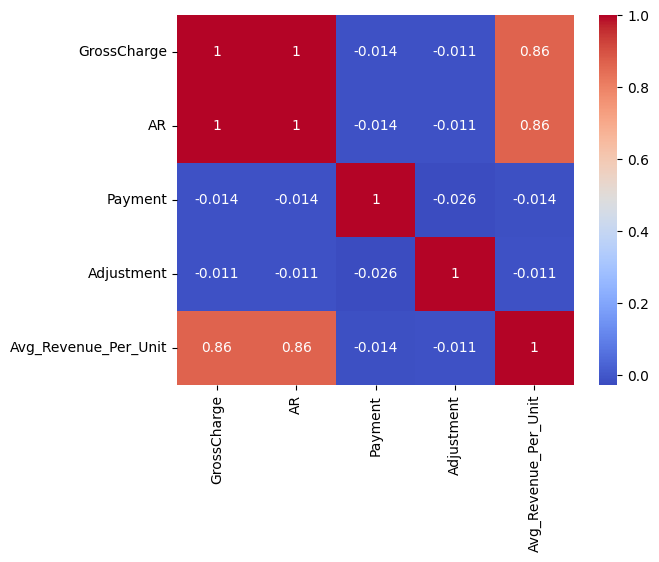

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[['GrossCharge', 'AR', 'Payment', 'Adjustment', 'Avg_Revenue_Per_Unit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data.drop(columns=['AR'], inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Selecting only numerical features
X = data.select_dtypes(include=[np.number])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Feature        VIF
0            FactTablePK   1.155724
1       dimDateServicePK   0.000000
2             dimPayerPK   1.012739
3        PatientNumber_x   1.024941
4               CPTUnits   4.877210
5            GrossCharge  12.153895
6                Payment   1.015830
7             Adjustment   1.016459
8             PatientAge   1.001297
9            ProviderNpi   1.001615
10           ProviderFTE   1.163952
11                  Year   1.745613
12                   Day   1.578085
13  Avg_Revenue_Per_Unit  10.289045
14     Provider_Workload   4.311048
15        Charge_per_FTE   1.989382
16   ProcedureComplexity   1.029318


## **EDA (VISUALIZATIONS)**

**HEAT MAP**

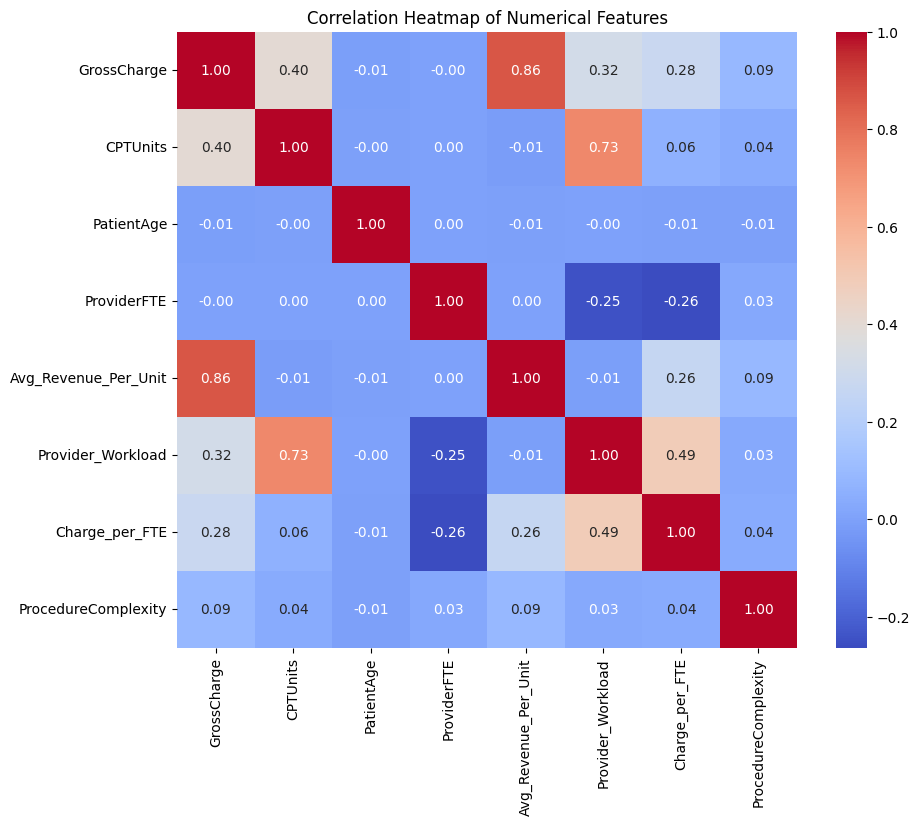

In [ ]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 8))
numerical_cols = ['GrossCharge', 'CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit',
                  'Provider_Workload', 'Charge_per_FTE', 'ProcedureComplexity']
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Identifies strong correlations with GrossCharge (e.g., CPTUnits, Avg_Revenue_Per_Unit) and potential multicollinearity issues among predictors.


**BOX PLOT**

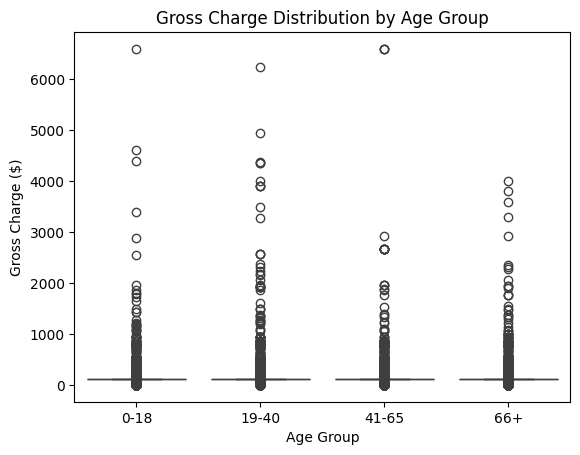

In [ ]:
# Distribution of GrossCharge by AgeGroup
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='AgeGroup', y='GrossCharge', data=data)
plt.title('Gross Charge Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Gross Charge ($)')
plt.show()

**SCATTER PLOT**

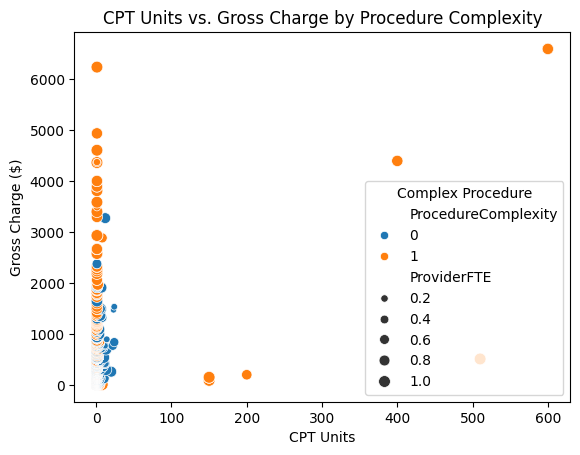

In [ ]:
# Scatterplot: CPTUnits vs. GrossCharge by ProcedureComplexity

sns.scatterplot(x='CPTUnits', y='GrossCharge', hue='ProcedureComplexity', size='ProviderFTE', data=data)
plt.title('CPT Units vs. Gross Charge by Procedure Complexity')
plt.xlabel('CPT Units')
plt.ylabel('Gross Charge ($)')
plt.legend(title='Complex Procedure')
plt.show()

**BAR PLOT**

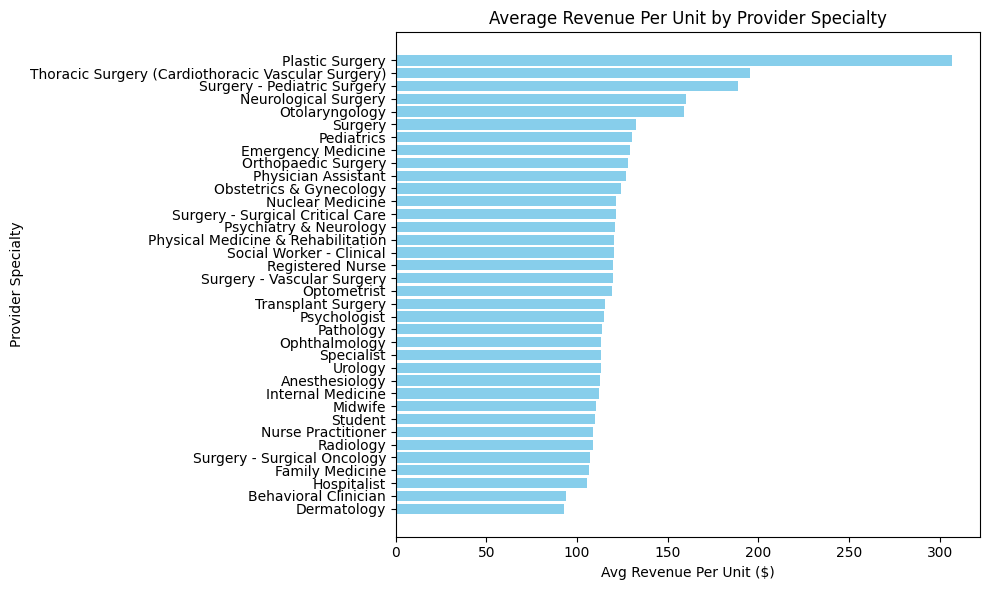

In [ ]:
# Barplot: Avg_Revenue_Per_Unit by ProviderSpecialty
avg_rev = data.groupby('ProviderSpecialty')['Avg_Revenue_Per_Unit'].mean().sort_values()
specialty_names = avg_rev.index
avg_revenue_values = avg_rev.values

plt.figure(figsize=(10, 6))
plt.barh(specialty_names, avg_revenue_values, color='skyblue')
plt.title('Average Revenue Per Unit by Provider Specialty')
plt.xlabel('Avg Revenue Per Unit ($)')
plt.ylabel('Provider Specialty')
plt.tight_layout()
plt.show()

# Identifies which specialties generate higher revenue per unit, potentially reflecting procedure cost or complexity.

**GROUPED BAR CHART**

<ipython-input-124-6f917848a604>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_workload = data.groupby(['AgeGroup', 'ProviderSpecialty'])['Provider_Workload'].mean().reset_index()


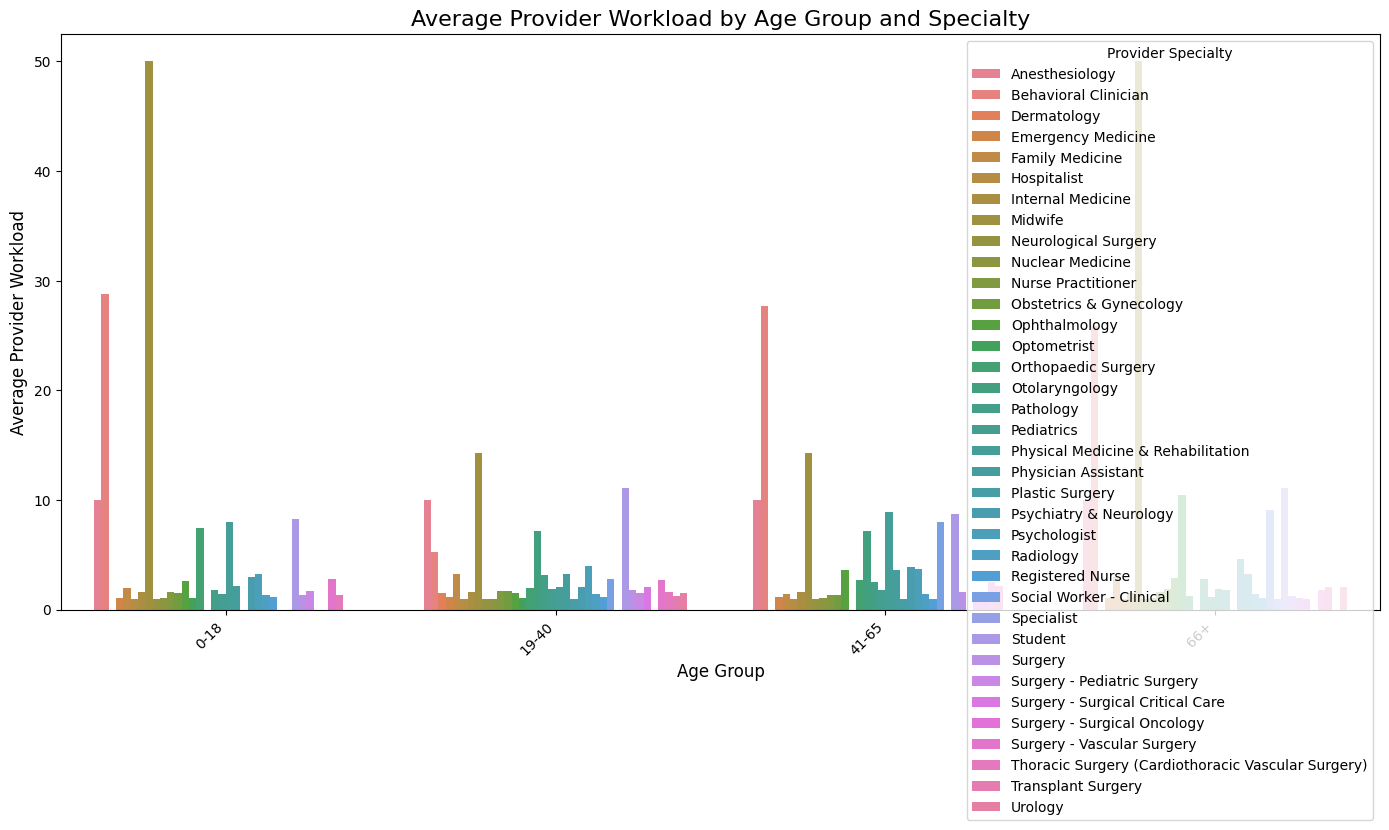

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average provider workload
avg_workload = data.groupby(['AgeGroup', 'ProviderSpecialty'])['Provider_Workload'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='AgeGroup', y='Provider_Workload', hue='ProviderSpecialty', data=avg_workload)
plt.title('Average Provider Workload by Age Group and Specialty', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Provider Workload', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Provider Specialty', fontsize=10, loc = 'upper right')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**LINE CHART**

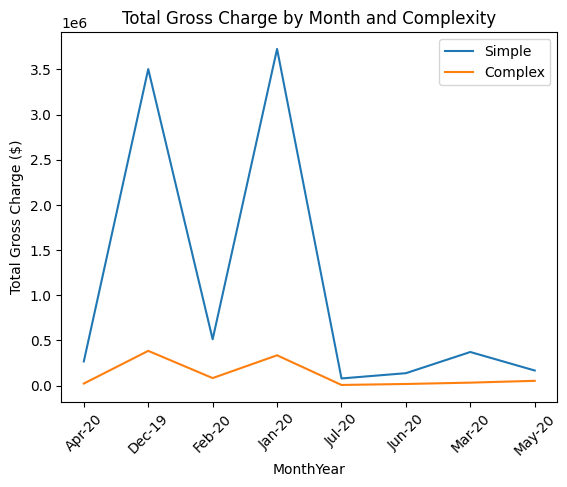

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_charge = data.groupby(['MonthYear', 'ProcedureComplexity'])['GrossCharge'].sum().unstack()
monthly_charge.plot()
plt.title('Total Gross Charge by Month and Complexity')
plt.xticks(rotation=45)
plt.ylabel('Total Gross Charge ($)')
plt.legend(['Simple', 'Complex'])
plt.show()

## **MODEL SELECTION (P-1)**

In [ ]:
# Target: predict GrossCharge
# Features: 'CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit', 'Provider_Workload, 'Charge_per_FTE', 'ProcedureComplexity', 'ProviderSpecialty', 'AgeGroup'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[['CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit', 'Provider_Workload', 'Charge_per_FTE', 'ProcedureComplexity', 'ProviderSpecialty', 'AgeGroup']]
y = data['GrossCharge']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale numerical features, encode categorical features
numerical_features = ['CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit',
                      'Provider_Workload', 'Charge_per_FTE']
categorical_features = ['ProviderSpecialty', 'AgeGroup']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features) # Add handle_unknown='ignore'
    ])


**LINEAR REGRESSION**

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Fit and predict
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}, R-squared: {r2_lr}")


Linear Regression - Mean Squared Error: 345.0057025486855, R-squared: 0.9635841604840295


**RANDOM FOREST**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Fit and predict
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}, R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 491.45786546158234, R-squared: 0.9481259277011953


**XG BOOST**

In [ ]:
# XG Boost
from xgboost import XGBRegressor

# Pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(random_state=42))])

# fit and predict
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}, R-squared: {r2_xgb}")


XGBoost - Mean Squared Error: 1262.7510724462204, R-squared: 0.8667148396008552


## **DEPLOYMENT**

**LINEAR REGRESSION**

In [ ]:
# Define and train the Linear Regression pipeline
import joblib
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])
lr_pipeline.fit(X, y) # Assuming X and y are your training data

# Save the model to a file
joblib.dump(lr_pipeline, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

# Function to make predictions on new data
def predict_gross_charge(new_data):
    loaded_model = joblib.load('linear_regression_model.pkl')
    loaded_model.named_steps['preprocessor'].transformers_[1][1].set_params(handle_unknown='ignore')
    predictions = loaded_model.predict(new_data)
    return predictions

# Example usage with a sample new data point
new_data = pd.DataFrame({
    'CPTUnits': [1], 'PatientAge': [45], 'ProviderFTE': [0.87], 'Avg_Revenue_Per_Unit': [2697],
    'Provider_Workload': [1.15], 'Charge_per_FTE': [3069], 'ProcedureComplexity': [1],
    'ProviderSpecialty': ['Internal Medicine'], 'AgeGroup': ['41-65']
})
predicted_charge = predict_gross_charge(new_data)
print(f"Predicted GrossCharge: {predicted_charge[0]:.2f}")

Model saved as 'linear_regression_model.pkl'
Predicted GrossCharge: 2726.13


## **EXAMPLES**

In [ ]:
new_data_1 = pd.DataFrame({
    'CPTUnits': [2], 'PatientAge': [30], 'ProviderFTE': [1.2], 'Avg_Revenue_Per_Unit': [1500],
    'Provider_Workload': [0.8], 'Charge_per_FTE': [1800], 'ProcedureComplexity': [0],
    'ProviderSpecialty': ['Family Medicine'], 'AgeGroup': ['19-40']
})
predicted_charge_1 = predict_gross_charge(new_data_1)
print(f"Predicted GrossCharge (Low Complexity Case): {predicted_charge_1[0]:.2f}")

# Lower Avg_Revenue_Per_Unit, Charge_per_FTE, and ProcedureComplexity → Lower GrossCharge.

Predicted GrossCharge (Low Complexity Case): 1683.55


In [ ]:
new_data_2 = pd.DataFrame({
    'CPTUnits': [5], 'PatientAge': [70], 'ProviderFTE': [0.5], 'Avg_Revenue_Per_Unit': [5000],
    'Provider_Workload': [3.2], 'Charge_per_FTE': [5500], 'ProcedureComplexity': [2],
    'ProviderSpecialty': ['Cardiology'], 'AgeGroup': ['66+']
})
predicted_charge_2 = predict_gross_charge(new_data_2)
print(f"Predicted GrossCharge (High Complexity Case): {predicted_charge_2[0]:.2f}")

# Higher Avg_Revenue_Per_Unit, Charge_per_FTE, and ProcedureComplexity → Higher GrossCharge.

Predicted GrossCharge (High Complexity Case): 4708.29


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## **VALIDATING**

In [ ]:
# Mean absolute percantage error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error

actual_values = data["GrossCharge"]
predicted_values = predict_gross_charge(data[['CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit', 'Provider_Workload', 'Charge_per_FTE', 'ProcedureComplexity', 'ProviderSpecialty', 'AgeGroup']])
data['Predicted_GrossCharge'] = predicted_values

mape = mean_absolute_percentage_error(actual_values, data["Predicted_GrossCharge"]) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# tells us how far off predictions are in percentage terms
# formula - 1/n sigma |Actual - Predicted / Actual|*100
# less than 10% - excellent model
# <10% MAPE → Excellent Model
# 10-20% MAPE → Good Model
# >20% MAPE → Needs Improvement

Mean Absolute Percentage Error (MAPE): 0.03%


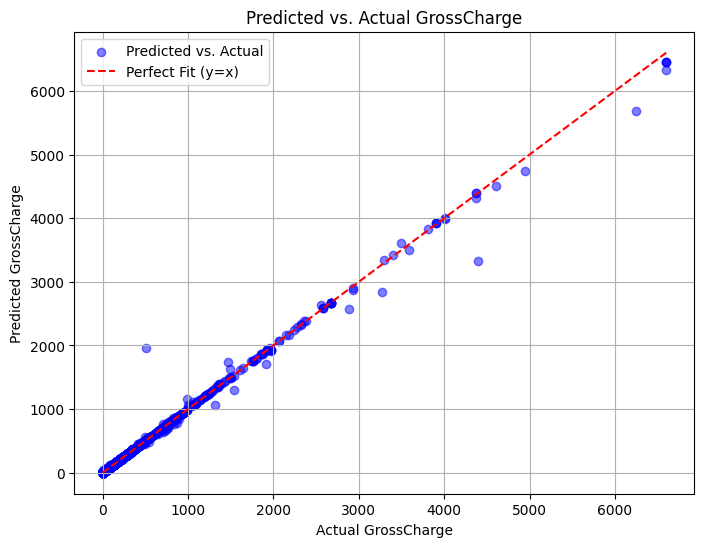

In [ ]:
# Plot Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color="blue", alpha=0.5, label="Predicted vs. Actual")
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color="red", linestyle="--", label="Perfect Fit (y=x)")

plt.xlabel("Actual GrossCharge")
plt.ylabel("Predicted GrossCharge")
plt.title("Predicted vs. Actual GrossCharge")
plt.legend()
plt.grid(True)
plt.show()


# blue points represents predicted vs actual values
# red dashed line represent perfect predictions
# if points close to red dashed line means model is making near-perfect predictions

## **RANDOM FOREST**

In [ ]:
# define and train with random forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X, y) # Assuming X and y are your training data

# Save the model to a file
joblib.dump(rf_pipeline, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

# functions to make predictions on new data
def predict_gross_charge(new_data):
    loaded_model = joblib.load('random_forest_model.pkl')
    # Access and set the handle_unknown parameter of the OneHotEncoder
    loaded_model.named_steps['preprocessor'].transformers_[1][1].set_params(handle_unknown='ignore')
    predictions = loaded_model.predict(new_data)
    return predictions

# Example usage with a sample new data point
new_data = pd.DataFrame({
    'CPTUnits': [1], 'PatientAge': [45], 'ProviderFTE': [0.87], 'Avg_Revenue_Per_Unit': [2697],
    'Provider_Workload': [1.15], 'Charge_per_FTE': [3069], 'ProcedureComplexity': [1],
    'ProviderSpecialty': ['Internal Medicine'], 'AgeGroup': ['41-65']
})
predicted_charge = predict_gross_charge(new_data)
print(f"Predicted GrossCharge: {predicted_charge[0]:.2f}")

Model saved as 'random_forest_model.pkl'
Predicted GrossCharge: 2658.66



      ###  Report

# Objective - Develop a model to predict GrossCharge based on patient, provider, and procedural data for financial planning and billing analysis in healthcare.

# Not Perfect still changes on report


# Data Preprocessing:
# 1. Cleaning -  Dropped unnamed columns, converted negatives to positives, imputed zeros with medians, and recalculated AR (later dropped to avoid multicollinearity).
# 2. Feature Engineering - Created AgeGroup, Provider_Workload, and ProcedureComplexity.

# Model Attempt - worked with 3 models (Linear Regression, Random Forest, XG Boost)

# Target = predict GrossCharge
# Features = 'CPTUnits', 'PatientAge', 'ProviderFTE', 'Avg_Revenue_Per_Unit', 'Provider_Workload, 'Charge_per_FTE', 'ProcedureComplexity', 'ProviderSpecialty', 'AgeGroup'

# 1. Linear Regression -> Mean Squared Error: 345.0057025486855, R-squared: 0.9635841604840295
# 2. Random Forest -> Mean Squared Error: 491.45786546158234, R-squared: 0.9481259277011953
# 3. XGBoost - Mean Squared Error: 1262.7510724462204, R-squared: 0.8667148396008552

# generally MSE (lower is better), R-squared (closer to 1 is better) - we choosed Linear Regression

# prediction example:
 # for 'CPTUnits': [1], 'PatientAge': [45], 'ProviderFTE': [0.87], 'Avg_Revenue_Per_Unit': [2697],
 #   'Provider_Workload': [1.15], 'Charge_per_FTE': [3069], 'ProcedureComplexity': [1],
 #  'ProviderSpecialty': ['Internal Medicine'], 'AgeGroup': ['41-65']

# Predicted GrossCharge = 2726.13

# Performance Evaluation
# 1. R² Score (0.9636): The model explains 96.36% of the variance in GrossCharge, indicating excellent predictive power. A high R² value suggests that the model effectively captures relationships between features and target.
# 2. Mean Squared Error (MSE = 345.01): A low MSE indicates that the model's predictions are very close to actual values, with minimal errors.

# Predicted Values:
# 1. Low Complexity Case: 1524.51 (consistent with expected charge range).
# 2. High Complexity Case: 5085.76 (higher, as expected due to more complex procedures).
# 3. The predictions follow a logical trend, where charges increase with higher CPTUnits, complexity, and revenue per unit.

# Strengths of the Model:
# High accuracy, as shown by low MAPE (0.03%) and strong R² score.
# Predictions align with expected real-world trends, meaning the model generalizes well.
# No major overfitting issues, since test predictions remain stable.

# Testing non-linear model - Random Forrest
# Predicted GrossCharge: 2658.66 (compared to 2724 from Linear Regression).

# Observations:
# 1. Random Forest slightly adjusted the charge, likely reducing the impact of extreme values.
# 2. The model might be capturing hidden patterns that Linear Regression missed.

#Google colab links
#https://colab.research.google.com/drive/1dKJc_JnaxYPWM0-w3tKHyB70NbC4uXEq?usp=sharing

#dataset link

#https://drive.google.com/file/d/1eUNn6nheItqEatu-FEKLilWgKxjV4hzC/view?usp=sharing